## Initial data exploration and augmentation



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os
import sys
import csv
import base64
from tqdm import tqdm
import pickle
from sklearn.cross_validation import train_test_split


/Users/peterluptak/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read the data - first the CVS

data_path = './custom-data2/driving_log.csv'

data_pd = pd.read_csv(data_path,names=['centercam', 'leftcam', 'rightcam','angle', 'gas', 'brake', 'speed'])

#Display the first 20 lines
data_pd.iloc[:20]

,centercam,leftcam,rightcam,angle,gas,brake,speed
0,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,0.000000,0.000000,0,0.000019
1,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,0.000000,0.000000,0,0.000014
2,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,0.000000,0.000000,0,0.000008
3,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,0.000000,0.000000,0,0.000006
4,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,0.000000,0.183570,0,0.068776
5,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,-0.009434,0.427578,0,0.408573
6,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,-0.015994,0.606717,0,0.759756
7,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,-0.045106,0.809751,0,1.302330
8,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,-0.071307,1.000000,0,2.177029
9,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,/Users/peterluptak/Code/ND-SDC/CarND-Behaviora...,-0.087670,1.000000,0,3.132222


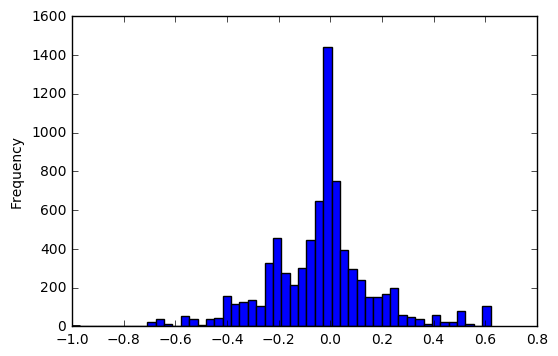

In [3]:
#map how the data is distributed
%matplotlib inline
data_pd['angle'].plot.hist(bins=50)

In [4]:
### Import data from the cvs to a list
data = []
with open(data_path) as dp:
    load = csv.reader(dp)
    for i in load:
        data.append(i) 
        
print("Import...success")
print("Data len:", len(data))

Import...success
Data len: 7816


In [5]:
### Crop the image 

def crop_img(row, i=0):
    img = plt.imread(row[i].strip())[60:140:4,0:-1:4,0]
    #plt.imshow(img)
    #print(type(img))
    #print(img.shape)
    return img.flatten().tolist()

features = ()
labels = ()

#img = crop_img(data[4500],0)



In [6]:


for i in tqdm(range(int(len(data))), unit='images'):
    for j in range(3):
        features += (crop_img(data[i],j),)



        
item_num = len(features)
print("features size", item_num)

#Save features
features = np.array(features).reshape(item_num, 20, 80, 1)
print("features shape", features.shape)

#Save labels    
for i in range(int(len(data))):
    for j in range(3):
        labels += (float(data[i][3]),)

labels = np.array(labels)

print("features:", features.shape)
print("labels:", labels.shape)

#Split into training, testing and validation 

X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.10,
    random_state=598594)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.20,
    random_state=598594)


100%|██████████| 7816/7816 [03:19<00:00, 39.22images/s]


features size 23448
features shape (23448, 20, 80, 1)
features: (23448, 20, 80, 1)
labels: (23448,)


In [7]:
import pickle


# Thanks to https://github.com/wonjunee/behavioral-cloning for the pickle dump routine 
# Save the data for easy access
pickle_file = 'data2.pickle'

done = False

while not done:
        print('Pickling...')
    
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_d': X_train,
                    'train_l': y_train,
                    'valid_d': X_valid,
                    'valid_l': y_valid,
                    'test_d': X_test,
                    'test_l': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
        
        print('Data pickled')
        done = True

Pickling...
Data pickled
